In [6]:
import sys
sys.path.append("./attention-module/MODELS")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
# Pulled offical module into my aws sagemaker ai lab space - then later wrote myself from paper.
from cbam import CBAM
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torchvision.models.resnet import BasicBlock

In [8]:
# BasicBlock taken from Resnet Paper https://arxiv.org/pdf/1512.03385

class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
                
        self.block_64 = self.make_big_block(64, count=2)
        self.block_128 = self.make_big_block(128, count=2)
        self.block_256 = self.make_big_block(256, count=2)
        self.block_512 = self.make_non_trans_big_block(512, count=2)
   
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(512, 200)
        self.dropout = nn.Dropout(0.5)

    def make_big_block(self, channel_count, count = 3, kernel_size = 3):
        ordering = []
        downsample = nn.Sequential(
            nn.Conv2d(channel_count, channel_count*2, kernel_size=1, stride=2, bias=False),
            nn.BatchNorm2d(channel_count*2),
        )
        for i in range(count):
            if i != count - 1:
                ordering.append(BasicBlock(channel_count, channel_count))
                ordering.append(CBAM(channel_count))
            else:
                ordering.append(BasicBlock(channel_count, channel_count*2, stride=2, downsample=downsample))
                ordering.append(CBAM(channel_count*2))

        return nn.Sequential(*ordering)

    def make_non_trans_big_block(self, channel_count, count = 3, kernel_size = 3):
        ordering = []

        for i in range(count):
            ordering.append(BasicBlock(channel_count, channel_count))

        return nn.Sequential(*ordering)


    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.block_64(x)
        x = self.block_128(x)
        x = self.block_256(x)
        x = self.block_512(x)
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc1(x)
        return x


size of validation dataset 300


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 0 Training Loss 5.416233528024655. Validation Loss 5.4399085553487145 Accuracy 0.6666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 1 Training Loss 5.271754969786794. Validation Loss 5.219553737640381 Accuracy 1.6666666666666667


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 2 Training Loss 5.175543274425564. Validation Loss 5.137794036865234 Accuracy 1.3333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 3 Training Loss 5.119424009641347. Validation Loss 5.113515300750732 Accuracy 1.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 4 Training Loss 5.044946578079079. Validation Loss 5.024441070556641 Accuracy 2.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 5 Training Loss 4.987105464533332. Validation Loss 4.938489735921224 Accuracy 1.6666666666666667


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 6 Training Loss 4.926250286088896. Validation Loss 4.8067072550455725 Accuracy 1.6666666666666667


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 7 Training Loss 4.875265646533544. Validation Loss 4.781169770558675 Accuracy 1.3333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 8 Training Loss 4.810674145969542. Validation Loss 4.754804032643636 Accuracy 2.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 9 Training Loss 4.72139031886217. Validation Loss 4.621811561584472 Accuracy 5.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 10 Training Loss 4.6372376255374395. Validation Loss 4.4701295026143395 Accuracy 5.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 11 Training Loss 4.544221469382047. Validation Loss 4.558554712931315 Accuracy 5.333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 12 Training Loss 4.4739602971252825. Validation Loss 4.4455972607930505 Accuracy 3.3333333333333335


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 13 Training Loss 4.387499115531554. Validation Loss 4.371166044871012 Accuracy 4.333333333333333


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 14 Training Loss 4.299687424918665. Validation Loss 4.125020720163981 Accuracy 7.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 15 Training Loss 4.196494177679954. Validation Loss 4.004454549153646 Accuracy 6.666666666666667


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 16 Training Loss 4.124588932704624. Validation Loss 4.080090646743774 Accuracy 8.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 17 Training Loss 4.0495542190265015. Validation Loss 3.95532036781311 Accuracy 7.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 18 Training Loss 3.9546735177008276. Validation Loss 3.7987838395436606 Accuracy 9.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 19 Training Loss 3.8546951214053733. Validation Loss 3.778582493464152 Accuracy 9.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 20 Training Loss 3.7545843586655385. Validation Loss 3.7089964008331298 Accuracy 11.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 21 Training Loss 3.7174760575959422. Validation Loss 3.5707332611083986 Accuracy 14.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 22 Training Loss 3.5789863970307327. Validation Loss 3.5693293603261314 Accuracy 14.666666666666666


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 23 Training Loss 3.5000581271530327. Validation Loss 3.4878333695729573 Accuracy 15.333333333333334


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 24 Training Loss 3.409649325120562. Validation Loss 3.432672643661499 Accuracy 17.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 25 Training Loss 3.31083995290166. Validation Loss 3.308971252441406 Accuracy 19.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 26 Training Loss 3.233953297996588. Validation Loss 3.2467078304290773 Accuracy 20.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 27 Training Loss 3.162440755470284. Validation Loss 3.413949359258016 Accuracy 20.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 28 Training Loss 3.094571162492801. Validation Loss 3.501274652481079 Accuracy 16.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 29 Training Loss 2.9774688722210514. Validation Loss 3.159197235107422 Accuracy 24.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 30 Training Loss 2.913782929385969. Validation Loss 3.119954684575399 Accuracy 24.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 31 Training Loss 2.8482714758699803. Validation Loss 3.1148885091145835 Accuracy 23.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 32 Training Loss 2.780759899583581. Validation Loss 2.9608375199635826 Accuracy 30.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 33 Training Loss 2.6674937809145907. Validation Loss 2.9755108483632404 Accuracy 24.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 34 Training Loss 2.6655827322297654. Validation Loss 3.051872278849284 Accuracy 22.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 35 Training Loss 2.556060996606637. Validation Loss 2.85549547513326 Accuracy 26.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 36 Training Loss 2.4555852759876795. Validation Loss 3.003516763051351 Accuracy 22.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 37 Training Loss 2.4339019275775153. Validation Loss 2.91096640586853 Accuracy 26.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 38 Training Loss 2.315397287780124. Validation Loss 2.8592282835642497 Accuracy 29.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 39 Training Loss 2.257877768446866. Validation Loss 2.819520355860392 Accuracy 34.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 40 Training Loss 2.170831216524725. Validation Loss 3.0426791604359944 Accuracy 30.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 41 Training Loss 2.120604001893719. Validation Loss 3.016810251871745 Accuracy 29.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 42 Training Loss 2.0331897448354495. Validation Loss 2.8676869901021322 Accuracy 33.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 43 Training Loss 1.96117076783336. Validation Loss 3.203293733596802 Accuracy 26.333333333333332


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 44 Training Loss 1.7106073387974725. Validation Loss 2.7401786422729493 Accuracy 30.666666666666668


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 45 Training Loss 1.5505064042945222. Validation Loss 2.7491136964162193 Accuracy 31.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 46 Training Loss 1.4810324989790493. Validation Loss 2.7348769251505534 Accuracy 33.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 47 Training Loss 1.4317030818746264. Validation Loss 2.7936228720347085 Accuracy 33.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 48 Training Loss 1.365022767289379. Validation Loss 2.802590243021647 Accuracy 35.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 49 Training Loss 1.3033274204470544. Validation Loss 2.803661476771037 Accuracy 39.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 50 Training Loss 1.2440280204159275. Validation Loss 2.8880618826548257 Accuracy 35.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 51 Training Loss 1.0610959012340067. Validation Loss 2.829047066370646 Accuracy 35.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 52 Training Loss 1.0028109713357751. Validation Loss 2.820448884963989 Accuracy 36.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 53 Training Loss 0.9349945717457516. Validation Loss 2.8237283611297608 Accuracy 36.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 54 Training Loss 0.9165094010571158. Validation Loss 2.7891130097707113 Accuracy 38.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 55 Training Loss 0.8190976896954286. Validation Loss 2.774010883967082 Accuracy 36.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 56 Training Loss 0.7534341342540469. Validation Loss 2.8062543455759683 Accuracy 37.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 57 Training Loss 0.7426534509466203. Validation Loss 2.7148172760009768 Accuracy 36.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 58 Training Loss 0.7006368619289405. Validation Loss 2.867178201675415 Accuracy 38.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 59 Training Loss 0.6865121240903923. Validation Loss 2.862015193303426 Accuracy 37.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 60 Training Loss 0.6809656267673625. Validation Loss 2.9062402057647705 Accuracy 37.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 61 Training Loss 0.6447425882440305. Validation Loss 2.769685017267863 Accuracy 36.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 62 Training Loss 0.5797983386200857. Validation Loss 2.955143486658732 Accuracy 38.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 63 Training Loss 0.5724663329325436. Validation Loss 2.82576652208964 Accuracy 39.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 64 Training Loss 0.5740490821859148. Validation Loss 2.893989299138387 Accuracy 37.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 65 Training Loss 0.5568413333512625. Validation Loss 2.859900763829549 Accuracy 43.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 66 Training Loss 0.5244496169532438. Validation Loss 2.9693400065104165 Accuracy 37.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 67 Training Loss 0.5011994403874954. Validation Loss 2.8521018346150715 Accuracy 42.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 68 Training Loss 0.5009270022741987. Validation Loss 2.8571426995595295 Accuracy 38.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 69 Training Loss 0.5024713786560315. Validation Loss 2.8665189011891683 Accuracy 38.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 70 Training Loss 0.4861029610744392. Validation Loss 2.8745837656656903 Accuracy 39.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 71 Training Loss 0.48687361460800627. Validation Loss 2.7465341663360596 Accuracy 38.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 72 Training Loss 0.4790420255453326. Validation Loss 2.955399840672811 Accuracy 38.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 73 Training Loss 0.4707618417512085. Validation Loss 2.9872921625773112 Accuracy 39.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 74 Training Loss 0.4907852269115053. Validation Loss 2.953661959966024 Accuracy 37.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 75 Training Loss 0.4831936613777289. Validation Loss 2.961099952061971 Accuracy 38.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 76 Training Loss 0.4649578890844023. Validation Loss 2.9962542215983072 Accuracy 37.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 77 Training Loss 0.46044630676895265. Validation Loss 3.0489227708180744 Accuracy 35.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 78 Training Loss 0.4679057328668359. Validation Loss 2.9340289783477784 Accuracy 37.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 79 Training Loss 0.467806872073332. Validation Loss 2.978480037053426 Accuracy 39.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 80 Training Loss 0.459048851816789. Validation Loss 2.816377929051717 Accuracy 39.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 81 Training Loss 0.4815450670596043. Validation Loss 2.949441156387329 Accuracy 38.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 82 Training Loss 0.4706730474117642. Validation Loss 2.9867848491668703 Accuracy 37.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 83 Training Loss 0.4724444005838561. Validation Loss 2.990353676478068 Accuracy 38.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 84 Training Loss 0.4737619146531952. Validation Loss 2.8977079677581785 Accuracy 40.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 85 Training Loss 0.4705271901144745. Validation Loss 2.8584595266977946 Accuracy 38.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 86 Training Loss 0.4502399721227699. Validation Loss 3.0028720887502036 Accuracy 39.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 87 Training Loss 0.4763965244706907. Validation Loss 2.825829350153605 Accuracy 42.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 88 Training Loss 0.4584304013815854. Validation Loss 3.0315060424804687 Accuracy 35.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 89 Training Loss 0.4523128374945209. Validation Loss 2.917835372289022 Accuracy 37.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 90 Training Loss 0.44673651112436535. Validation Loss 2.880769370396932 Accuracy 39.0


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 91 Training Loss 0.45672666004845497. Validation Loss 2.9037880229949953 Accuracy 39.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 92 Training Loss 0.46016873668946. Validation Loss 3.022990954717 Accuracy 38.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 93 Training Loss 0.4593626602641482. Validation Loss 2.9031787236531574 Accuracy 40.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 94 Training Loss 0.45256815534078493. Validation Loss 2.9047416400909425 Accuracy 39.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 95 Training Loss 0.456896312579298. Validation Loss 2.8855812835693357 Accuracy 41.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 96 Training Loss 0.46283500460226745. Validation Loss 2.9904353364308673 Accuracy 39.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 97 Training Loss 0.46621937436893357. Validation Loss 2.9312358856201173 Accuracy 37.333333333333336


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 98 Training Loss 0.45032160627368795. Validation Loss 2.8162975692749024 Accuracy 38.666666666666664


  0%|          | 0/178 [00:00<?, ?it/s]

Epoch 99 Training Loss 0.4530564379934935. Validation Loss 3.0237885252634684 Accuracy 39.333333333333336
Test Accuracy: 39 % 


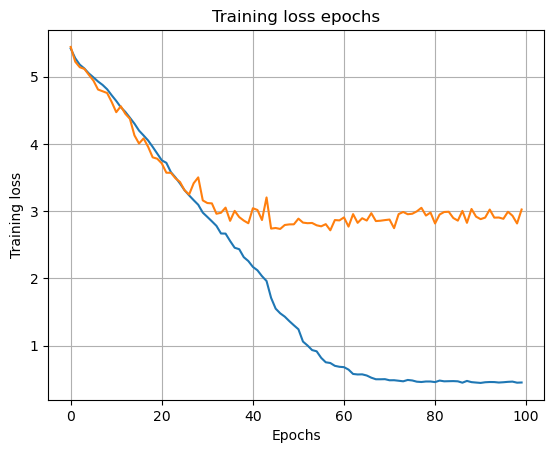

In [ ]:
# I looked up how to bold words so I could make test accuracy more visible in output
bold_start = "\033[1m"
bold_end = "\033[0m"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])
])

transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])])


batch_size = 32
epochs = 100
num_classes = 200

def create_list_of_epochs(epochs):
    list_of_epochs = []
    for epoch in range(epochs):
        list_of_epochs.append(epoch)
    return list_of_epochs


train_dataset = datasets.ImageFolder("CUB_200_2011_reorganized/train",
                                     transform=train_transform)
length_of_inital_train_dataset = int(0.95 * len(train_dataset))
length_of_validation_dataset = len(train_dataset) - length_of_inital_train_dataset
train_dataset, validation_dataset = random_split(
    train_dataset, [length_of_inital_train_dataset, length_of_validation_dataset])
validation_dataset.transform = transform
test_dataset = datasets.ImageFolder("CUB_200_2011_reorganized/test",
                                    transform=transform)

print(f"size of validation dataset {len(validation_dataset)}")

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
validation_loader = DataLoader(validation_dataset, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

model = MyNet()
model = nn.DataParallel(model)
model = model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-4)
validation_loss_tracker = []

list_of_training_loss = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        prediction = model(images)
        loss = loss_function(prediction, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    training_loss_for_epoch = running_loss/len(train_dataset)
    list_of_training_loss.append(training_loss_for_epoch)

    model.eval()
    validation_loss = 0
    correct_for_validation = 0
    total_for_validation = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_function(outputs, labels)
            validation_loss += loss.item() * images.size(0)
            nothing, predicted = torch.max(outputs.data, 1)
            total_for_validation += labels.size(0)
            correct_for_validation += (predicted == labels).sum().item()
    avg_val_loss = validation_loss / len(validation_dataset)
    validation_loss_tracker.append(avg_val_loss)
    accuracy = 100 * correct_for_validation / total_for_validation
    print(f"Epoch {epoch} Training Loss {training_loss_for_epoch}. Validation Loss {avg_val_loss} Accuracy {accuracy}")


correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        model.eval()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        nothing, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'{bold_start}Test Accuracy: {100 * correct // total} % {bold_end}')


list_of_epochs = create_list_of_epochs(epochs)

plt.xlabel("Epochs")
plt.ylabel("Training/Validation loss")
plt.title("Training loss epochs")
plt.plot(list_of_epochs, list_of_training_loss, label="Training Loss")
plt.plot(list_of_epochs, validation_loss_tracker, label="Validation loss")
plt.grid(True)
plt.show()
